# PV panel efficiency

This notebook is an exercise in calculating the efficiency of a PV panel based on current and voltage measurements from a flash test.

The notebook is hosted on Google Colab, which is an interactive computing environment that allows you to run Python Jupyter Notebooks in your browser without having to install Python.

Remember that to execute the code in a cell, click "Ctrl+Enter".

## Step 1: Install and load packages

The first step is to install and import some necessary Python packages.

Remember to execute the cells, simply click the cell and then Ctrl+Enter.

In [1]:
# Install pvlib on Google Colab, as this is not a standard package.
!pip install pvlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 65.7 MB/s eta 0:00:00


In [2]:
import pvlib  # library for PV and solar calculations
import numpy as np  # library for math and linear algebra
import pandas as pd  # library for data analysis
import matplotlib.pyplot as plt  # library for plotting

## Step 1: Import measurement data

The measurement data is available [here](https://raw.githubusercontent.com/AdamRJensen/design-build-3/refs/heads/main/pv_panel_iv_curve.csv).

In [3]:
url = 'https://raw.githubusercontent.com/AdamRJensen/design-build-3/refs/heads/main/pv_panel_iv_curve.csv'

data = pd.read_csv(url)

data.head()  # print the first five rows

,Voltage [V],Current [A]
0,0.000000,0.084034
1,0.064205,0.084024
2,0.133806,0.083967
3,0.204075,0.084010
4,0.274773,0.083886


## Step 2: Plot the raw data

When working with measurement data, it is always important to visualize the data.

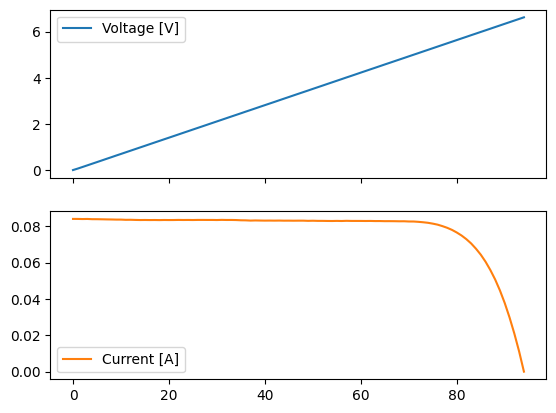

In [5]:
data.plot(subplots=True);

## Step 3: Plot the relationship between current and voltage

The relationship between current and voltage is difficult to interpret from the above plot.

👉 **Action**: Instead, a better way to visualize the data is to plot the current as a function of voltage.

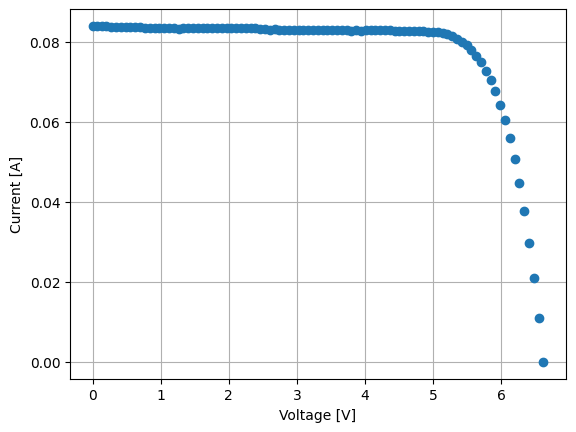

In [6]:
# Write your code here
plt.plot(data['Voltage [V]'], data['Current [A]'], 'o')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.grid(True)
plt.show()


## Step 4: Calculate power

The plot you created in the previous step should show a clear relationship between current and voltage.

Nevertheless, it is difficult to gauge the exact combination of voltage and current that results in the highest power.

To determine the maximum power output, we first need to calculate the power. Remember that electrical power can be calculated as:

$P = I * V$

where $P$ is power in Watts, $I$ is current in amps, and $V$ is voltage in volts.

👉 **Action**: Complete the code line below to calculate power.

In [9]:
# Complete the below line of code

data['Power [W]'] = data['Voltage [V]'] * data['Current [A]']
data['Power [W]']



,Power [W]
0,0.000000
1,0.005395
2,0.011235
3,0.017144
4,0.023050
...,...
90,0.239090
91,0.190977
92,0.135707
93,0.072554


## Step 5: Determine maximum power point

👉 **Action**: In this step, you need to determine the voltage level that results in the highest power output. This point is known as the maximum power point (MPP).

In [10]:
# Write your code here
P_max = data['Power [W]'].max()
idx_max = data['Power [W]'].idxmax()

V_mpp = data.loc[idx_max, 'Voltage [V]']
I_mpp = data.loc[idx_max, 'Current [A]']

P_max, V_mpp, I_mpp


(0.43448571477500003, np.float64(5.48975), np.float64(0.0791449))

## Step 6: Compare with nominal capacity

The datasheet of the PV panel listed a nominal capacity of 0.5 W.

👉 **Action**: Investigate how the datasheet values compare with your findings in the previous step.

In [12]:
# Write your code here
P_max


0.43448571477500003

## Step 7: Calculate efficiency

To be intercomparable, PV measurements are made under standardized conditions, known as standard test conditions (STC). The measurement provided were made under STC conditions.

The STC specifications are:
- Irradiance: 1000 W/m²
- Panel temperature: 25 °C
- Spectrum: Air mass 1.5

👉 **Action**: The last step of this exercise is to calculate the actual efficiency of the PV panel. The efficiency is calculated as the measured maximum output power under STC divided by the input irradiance in watts. For this calculation, you need to use the irradiance, the maximum power, and the panel area.

In [16]:
# Write your code here
G = 1000        # W/m^2
A = 0.01        # m^2 (panel area)

efficiency = P_max / (G * A)


efficiency * 100 # Percentage


4.34485714775